<a href="https://colab.research.google.com/github/KevinGomez26/Posterior_aprox/blob/main/Exercises_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate data from the following model.

$p(\mathcal{D}\mid \mu, \tau) = \left(\frac{\tau}{2\pi}\right)^{\frac{N}{2}}\exp{\left\lbrace-\frac{\tau}{2} \sum_{i = 1}^{N}(x_{i}-\mu)^{2}\right\rbrace}$

Where the prior for $\mu$ and $\tau$ are given by conjugate priors as.

$p(\mu\mid\tau) = \mathcal{N}(\mu\mid\mu_{0},(\lambda_{0}\tau)^{-1})$ \\
$p(\tau) = Gam(\tau\mid a_{0}, b_{0})$


In [5]:
import numpy

import matplotlib.pyplot as plt

from scipy.stats import norm, gamma

Initialize parameters for noninformative priors.

$\mu_{0} = a_{0} = b_{0} = \lambda_{0} = 0$

Text(0, 0.5, '$p(x\\mid \\mu, \tau)$')

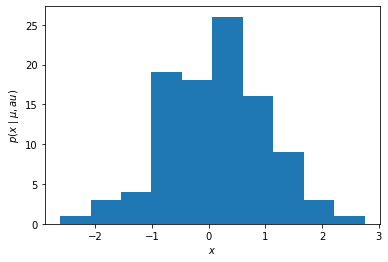

In [6]:
u_0, a_0, b_0, l_0, N =  0, 20, 20, 10, 100

u, t = 0, 1 

x = numpy.random.normal(loc = u, scale = numpy.sqrt(1 / t), size = N)

plt.hist(x, bins = 10)
plt.xlabel('$x$')
plt.ylabel('$p(x\mid \mu, \tau)$')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, '$\tau $')

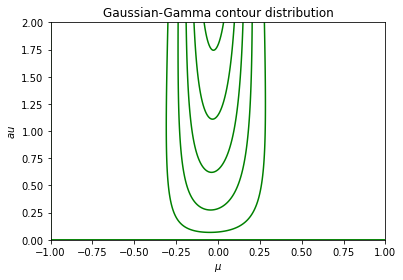

In [7]:
mus = numpy.linspace(-1, 1, 400)

taus = numpy.linspace(0, 2, 400)

z_prior = numpy.empty([len(mus), len(taus)])

p_t = gamma(a = a_0, loc = 0, scale = 1 / b_0)

for i, tau in enumerate(taus):

  p_u = norm(loc = u_0, scale = 1 / numpy.sqrt(l_0 * tau))

  z_prior[:, i]  = p_u.pdf(mus) * p_t.pdf(taus)

plt.contour(*numpy.meshgrid(mus, taus), z_prior.T, levels = 5, colors=['green'])

plt.title('Gaussian-Gamma contour distribution')

plt.xlabel('$\mu$')

plt.ylabel('$\tau $')

The update rule for each parameter are.

For the Gaussian distribution.

$\mu_{N} = \frac{\lambda_{0}\mu_{0}+N\mu_{ML}}{\lambda_{0}+N}$

$\lambda_{N} = \frac{a_{N}}{b_{N}}(\lambda_{0}+N)$

For the Gamma distribution.

$a_{N} = a_{0} + \frac{N}{2}$

$b_{N} = \left[ b_{0} + \frac{1}{2}\sum_{i = 1}^{N}(x_{i}-\mu_{ML})^{2}+\lambda_{0}(\mu_{ML} - \mu_{0})^{2} \right]\left[ \frac{2Na_{N}}{2Na_{N}- N - \lambda_{0}}\right]$

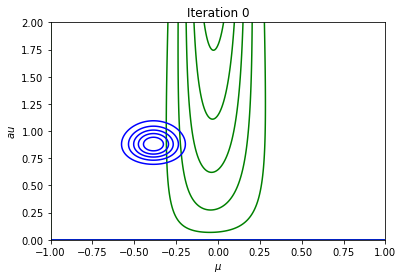

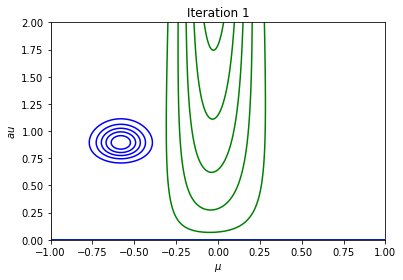

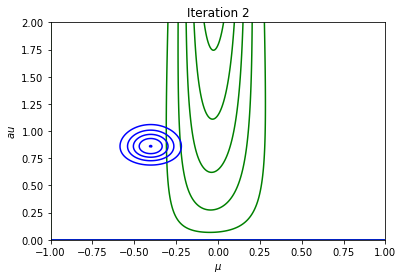

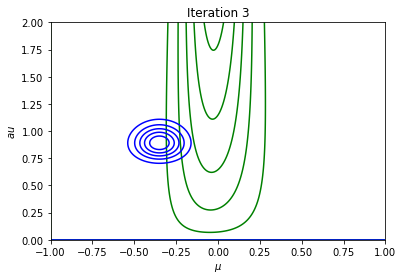

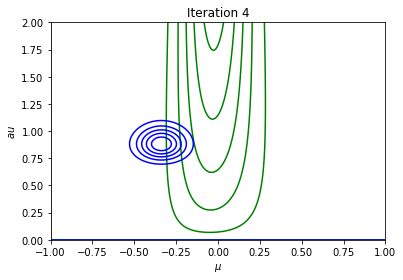

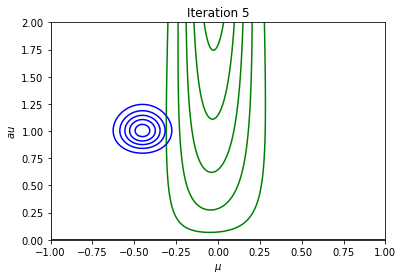

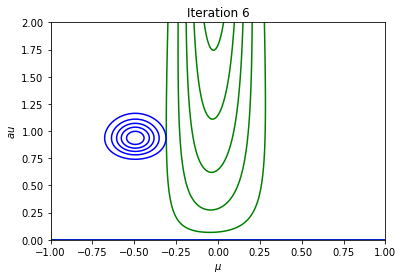

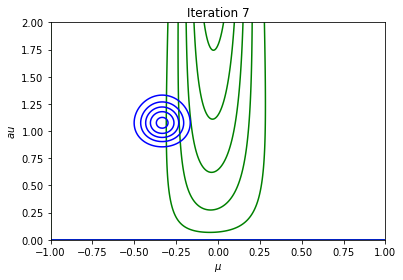

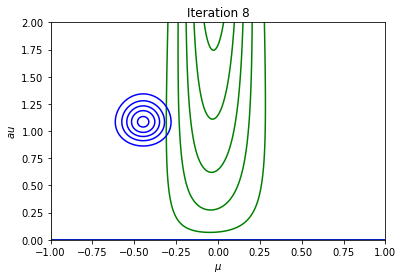

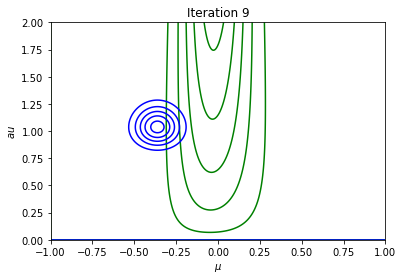

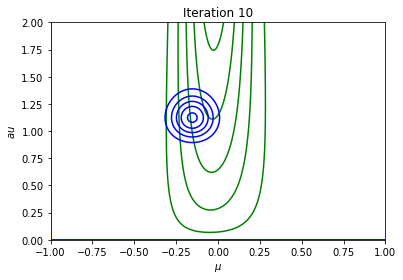

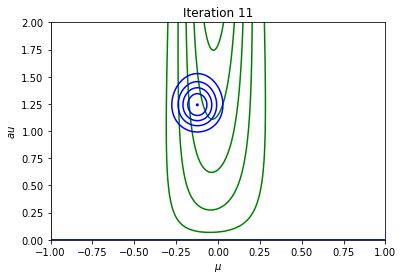

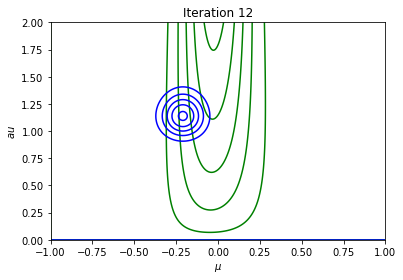

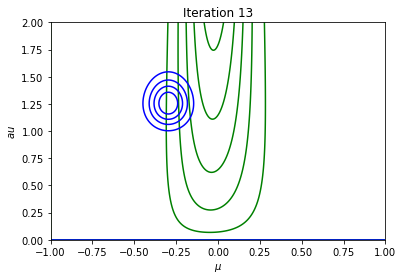

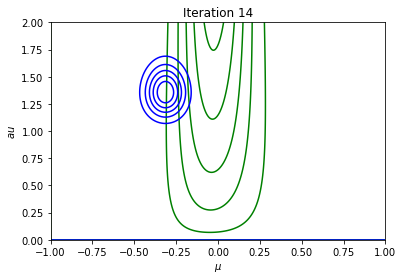

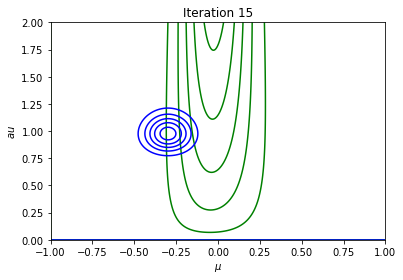

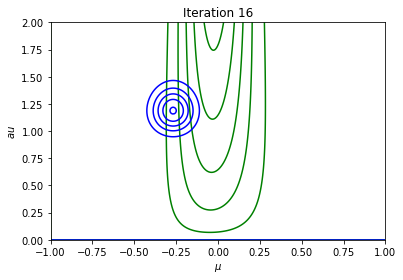

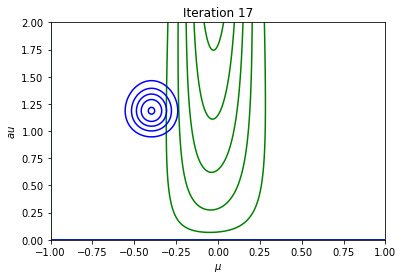

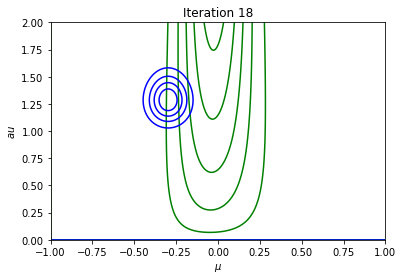

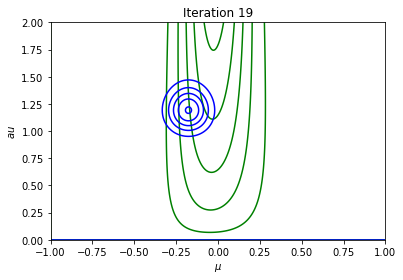

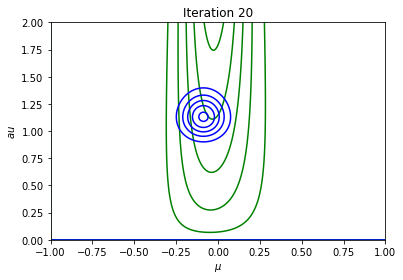

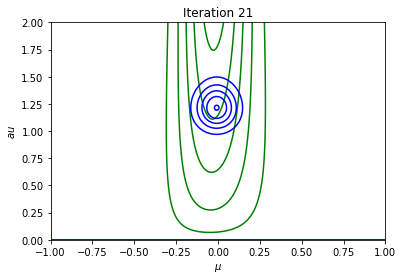

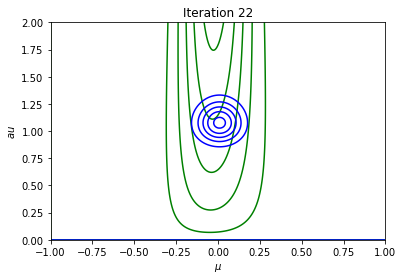

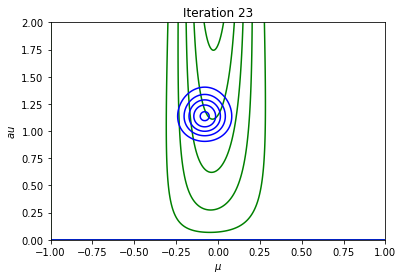

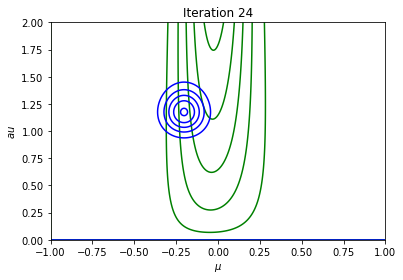

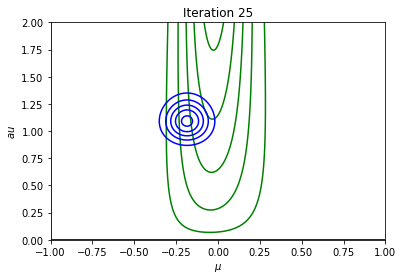

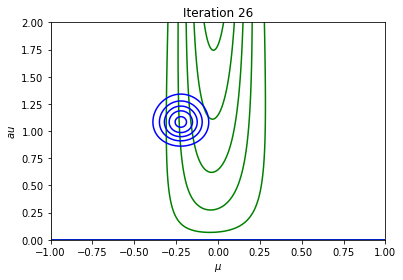

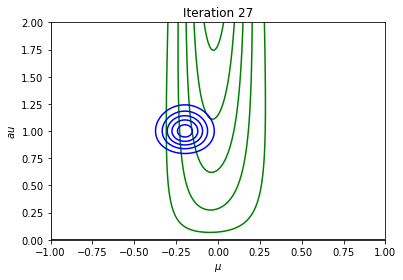

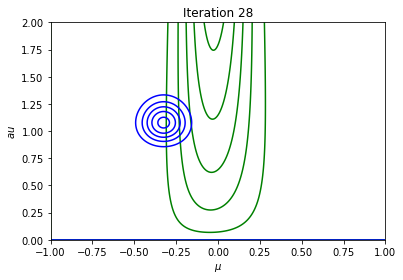

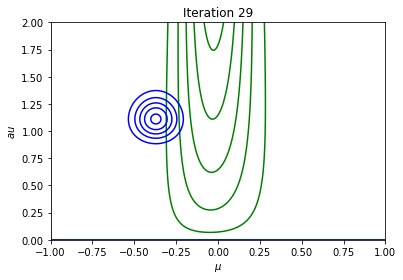

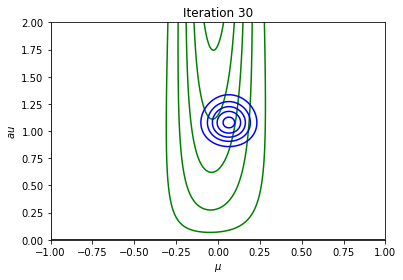

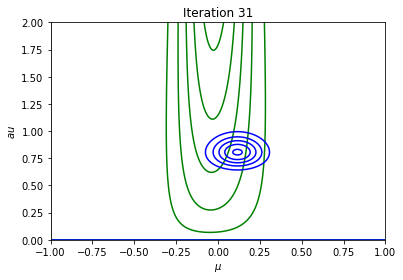

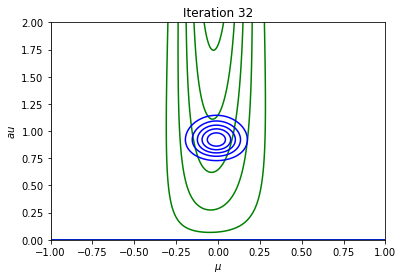

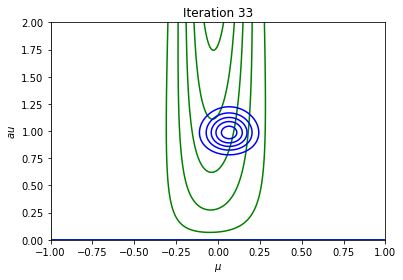

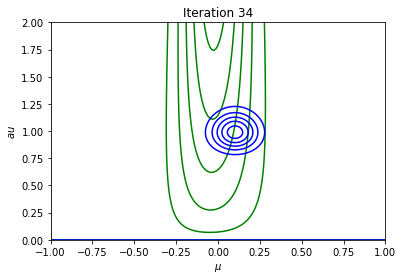

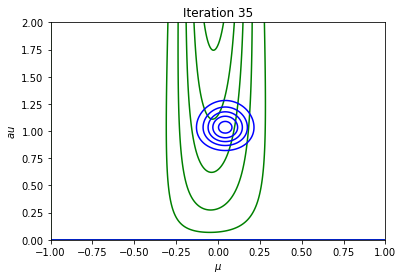

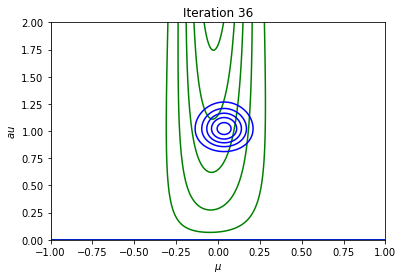

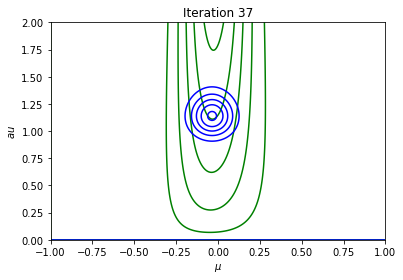

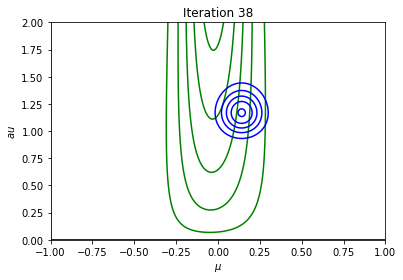

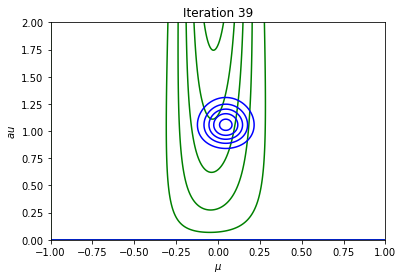

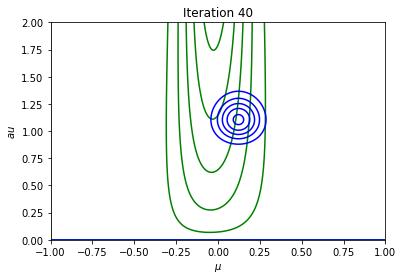

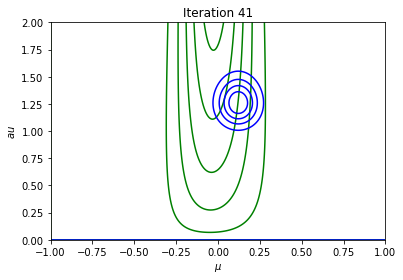

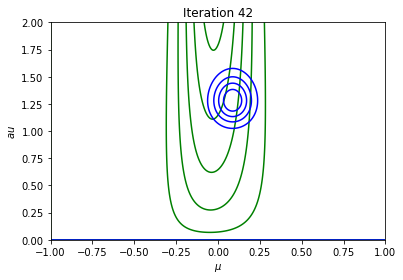

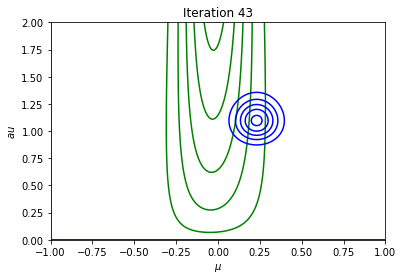

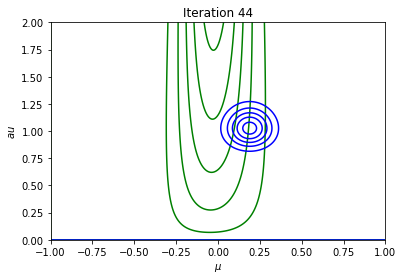

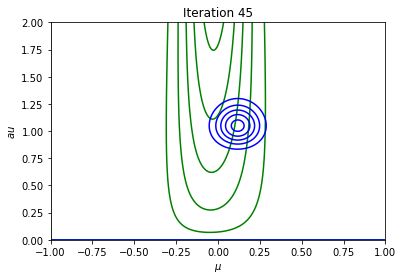

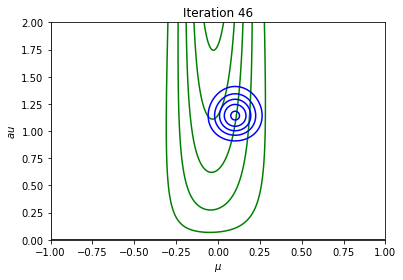

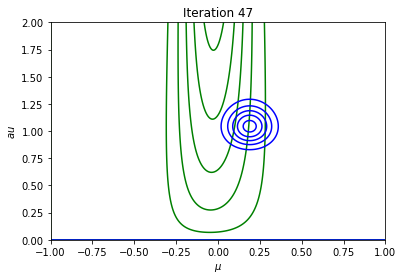

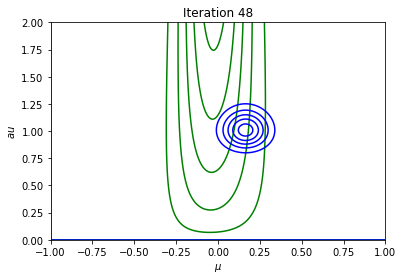

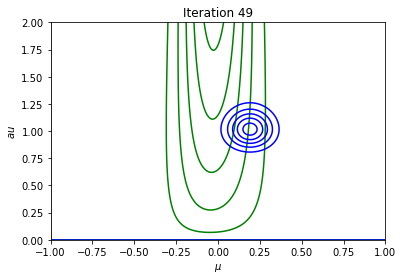

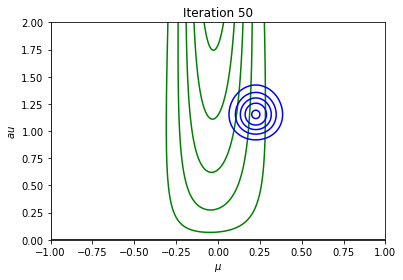

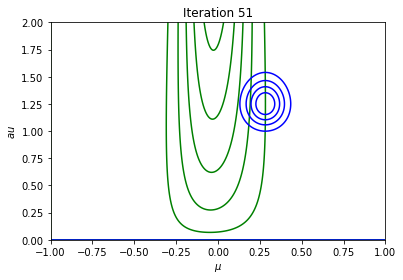

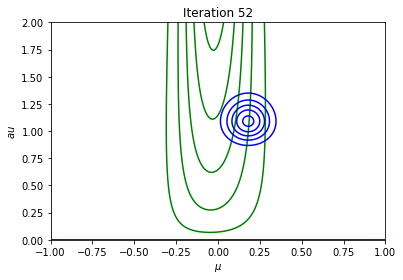

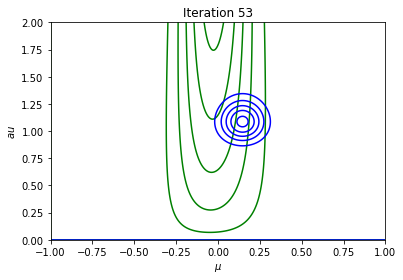

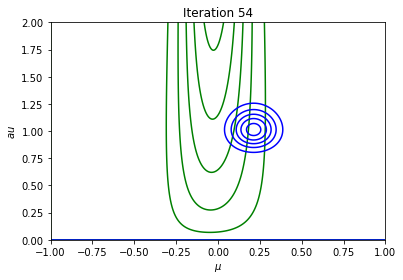

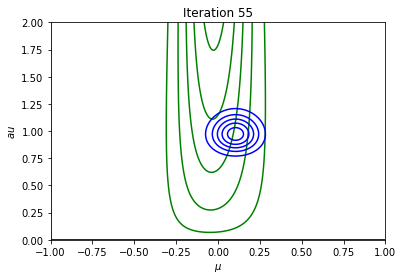

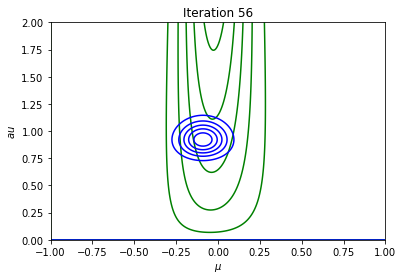

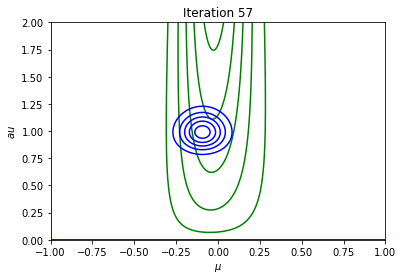

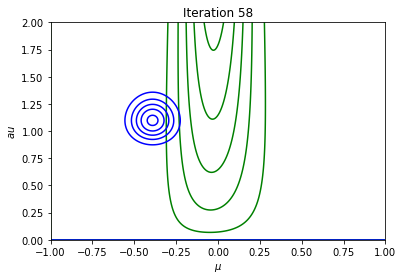

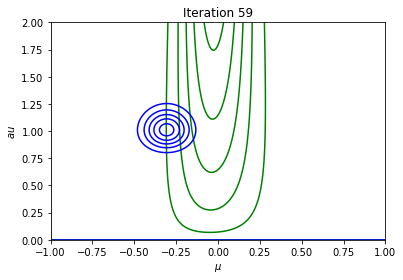

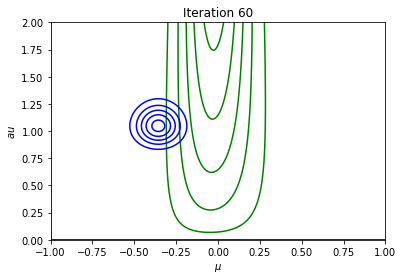

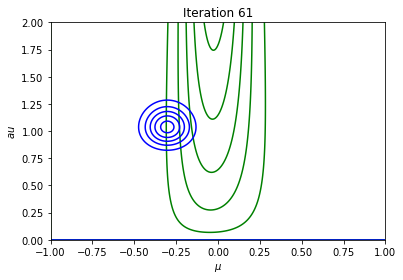

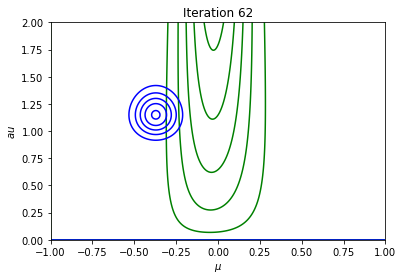

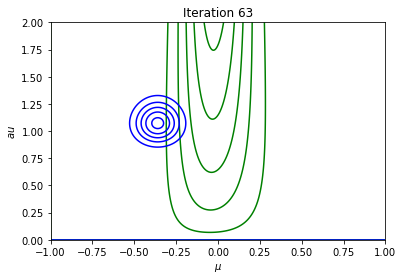

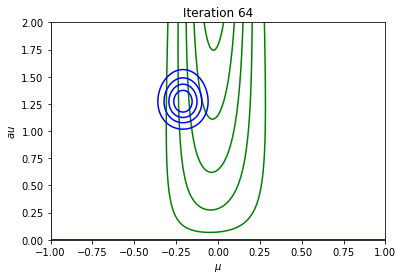

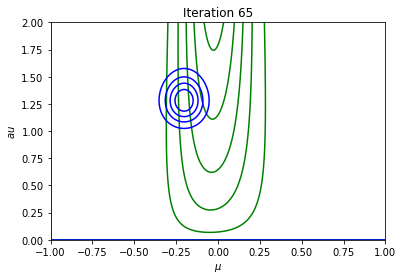

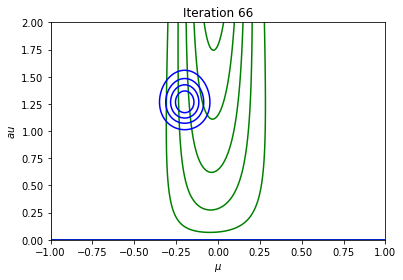

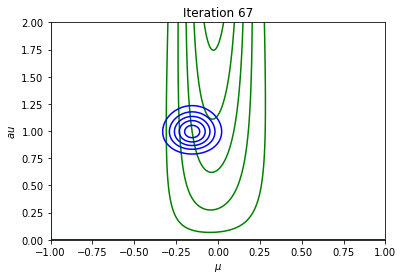

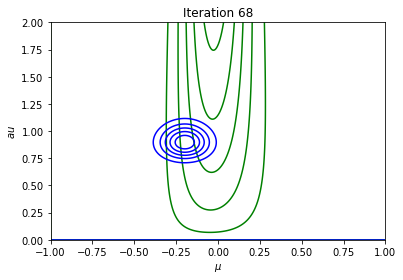

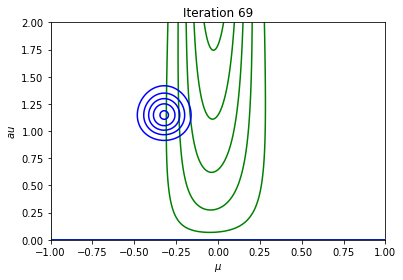

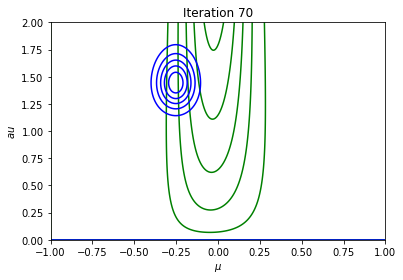

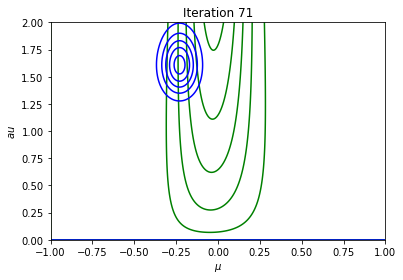

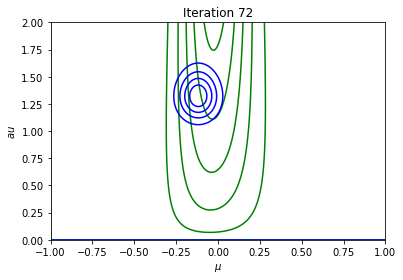

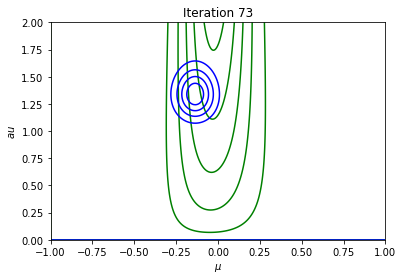

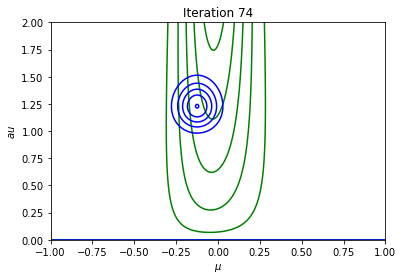

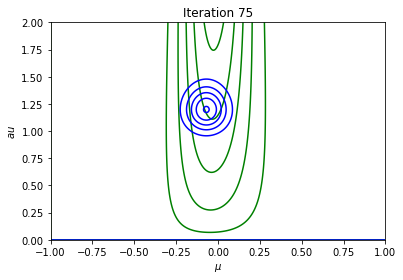

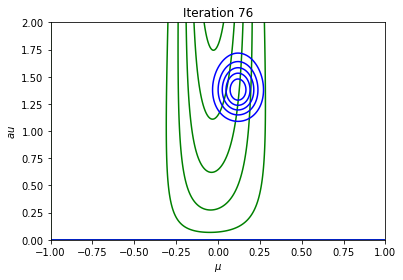

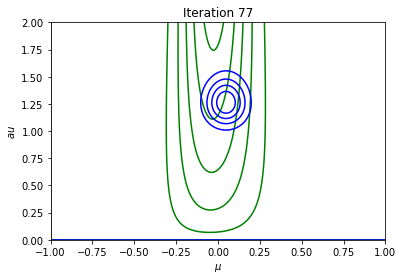

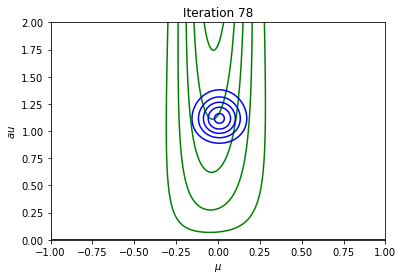

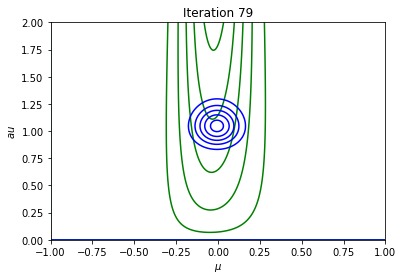

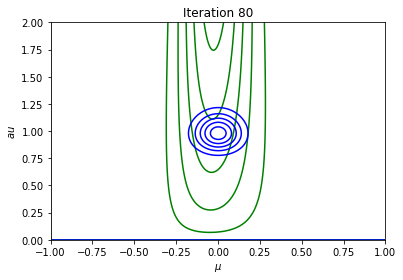

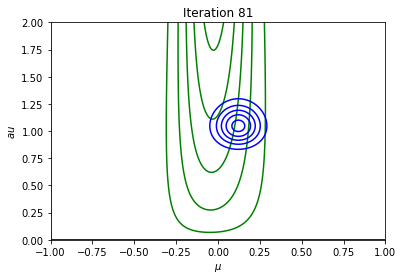

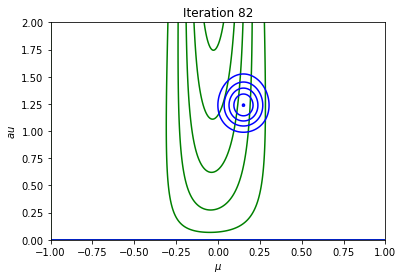

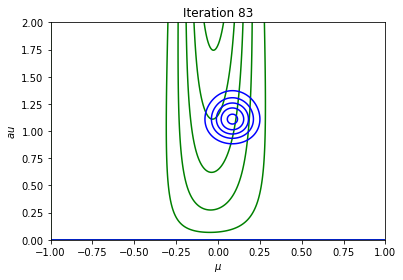

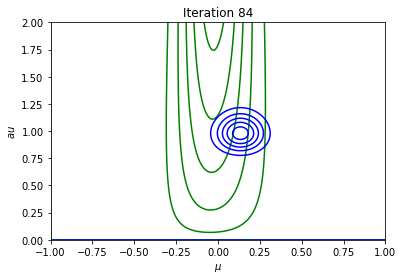

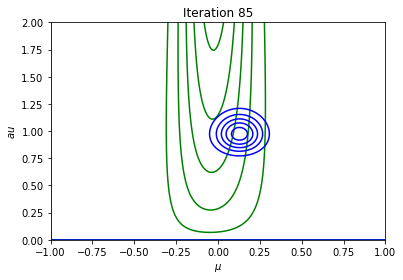

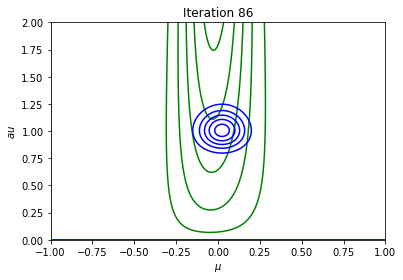

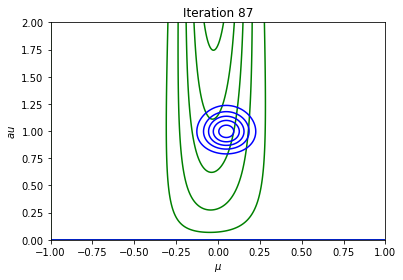

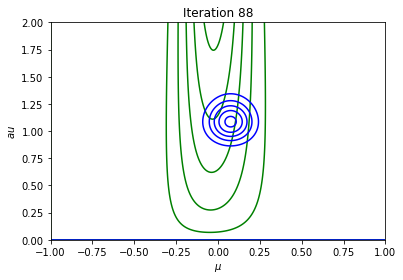

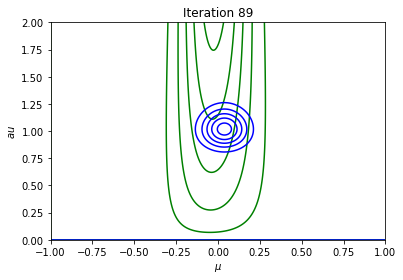

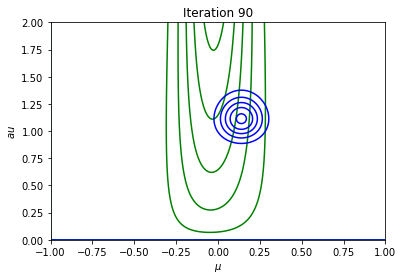

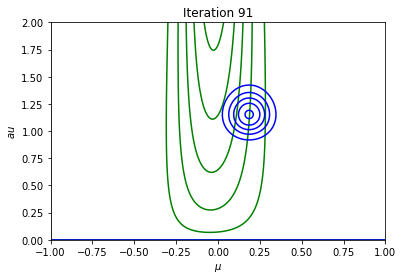

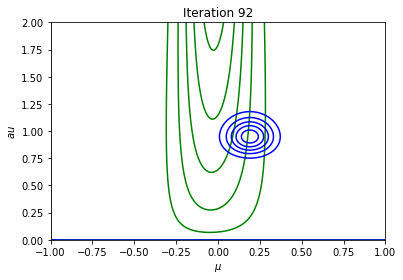

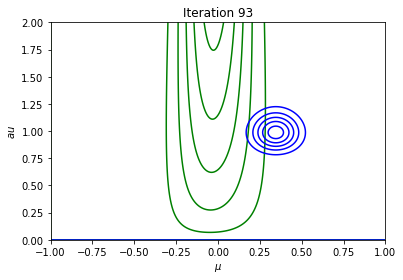

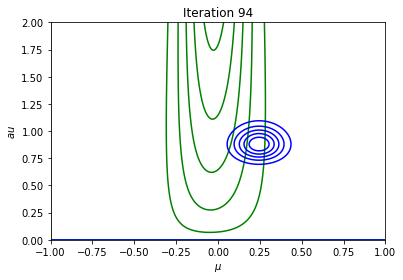

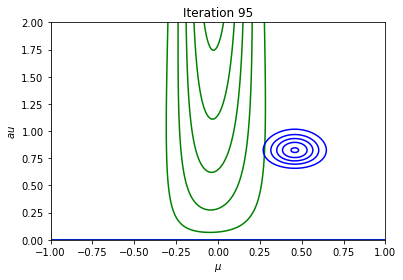

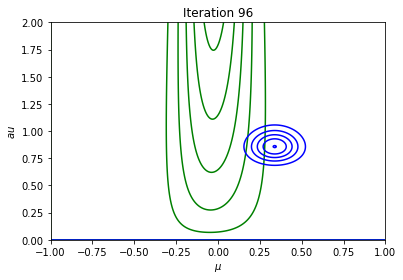

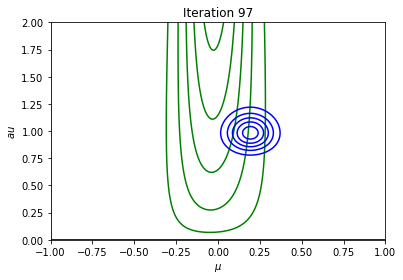

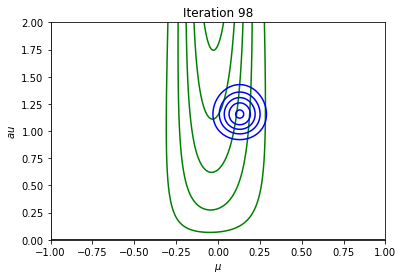

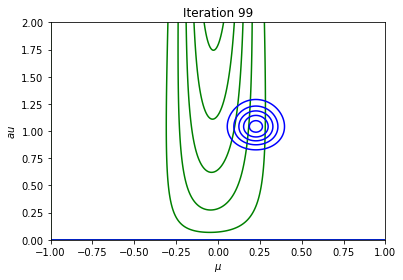

<Figure size 432x288 with 0 Axes>

In [9]:
iterations = 100

for i in range(iterations):

  a_N =  a_0 + N/2

  b_N = (b_0 + (1/2) * x.var() * N + (1/2) * l_0 * ((x.mean() - u_0) ** 2)) * ((2 * N * a_N )/ (2 * N * a_N - N - l_0))

  u_N = (l_0 * u_0 + N * x.mean()) / (l_0 + N)

  l_N = (a_N / b_N) * (l_0 + N)

  p_t = gamma(a = a_N, loc = 0, scale = 1 / b_N)

  p_u = norm(loc = u_N, scale = 1 / numpy.sqrt(l_N))

  z = numpy.outer(p_u.pdf(mus), p_t.pdf(taus))

  plt.contour(*numpy.meshgrid(mus, taus), z_prior.T, levels = 5, colors=['green'])

  plt.contour(*numpy.meshgrid(mus, taus), z.T, levels = 5, colors=['blue'])

  plt.title('Iteration {}' .format(i))

  plt.xlabel('$\mu$')

  plt.ylabel('$\tau $')

  plt.show()

  t_N = a_N / b_N

  x = numpy.random.normal(loc = u_N, scale = numpy.sqrt(1/t_N), size = N)
